# BA780 Analyzing Inpatient medical expense in US

## Contents

### 1. Introduction
##### 1.1 Tableau Visualization
##### 1.2 Data source
##### 1.3 Objectives
##### 1.4 Term Explanation

### 2. Data Preparation
##### 2.1 Data Pre-processing
##### 2.2 Data Overview

### 3. Exploratory Data Analysis
##### 3.1 Total Payment by State
##### 3.2 Medicare Payment by State
##### 3.3 Coverage Rate by State
##### 3.4 Coverage Rate Findings

### 4. Conclusions

### 5. References

## 1. Introduction

#### 1.2 Data source

We collect our data from CMS(Centers for Medicare & Medicaid Services) official website. CMS is a federal agency within the United States Department of Health and Human Services (HHS) that administers the Medicare program and works in partnership with state governments to administer Medicaid, the Children's Health Insurance Program (CHIP), and health insurance portability standards. We are going to focus on analyzing the data 'Medicare Provider Utilization and Payment Data: Inpatient' from the year 2011 to 2017. Moreover, we collect the United state's household income by states and life expectancy by state data from the CDC(Centers for Disease Control and Prevention) and the United States Census Bureau. We will use the US household income from 2010 to 2017 by states and the life expectancy data including estimates of U.S. life expectancy at birth by state and census tract for the period 2010-2015. 

#### 1.3 Objectives

Our goal is to analyze the inpatient expense of US medicare. We would like to explore the relations of covered rate, medicare charges, and total payments with regions, using visualization for medical charges and payments in different states from 2011 to 2017. Based on the exploratory analysis results, we will further utilize a machine learning model to predict total payments using relevant features. In addition, we are going to find and to analyze the relationship between inpatient expense and household income, inpatient expense, and life expectancy. 

#### 1.4 Term Explanation

The following terms are 3 primary factors that we use to analyze the inpatient expense of US medicare. 
- Total payments: all expenses that the hospital charged to patients(amount of patient paid + amount of medicare paid) 
- Medicare payment: the amount of expenses that paid by Medicare
- Cover rate: Medicare payment/Total Payments


## 2. Data Preparation

#### 2.1 Data Pre-processing

##### Import packages

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [59]:
inpatient_2015=pd.read_csv('inpatient_2015.csv')
inpatient_2017=pd.read_csv('Inpatient_2017.csv')
life_expectancy = pd.read_csv('US_life_expectancy.csv')
payment_7years = pd.read_csv('patments_by_state_in_7_years.csv')

In [35]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            51 non-null     object 
 1   Life Expectancy  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 944.0+ bytes


For data pre-processing, we reintegrated the inpatient tables of 'cms_medicare' dataset from 'bigquery-public-data', inserted 'year' column to make it clear when we union the tables for our future analysis.

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE temp.inpatient_2011 as
SELECT * ,2011 AS year 
FROM `bigquery-public-data.cms_medicare.inpatient_charges_2011`

#### 2.2 Data Overview

At the beginning, we will look at the overall average level of medical payments in the United States from 2011 to 2017.

In [40]:
payment_7years.pivot_table(index ='provider_state', values=['average_total_payments','average_medicare_payments','cover_rate'])

,average_medicare_payments,average_total_payments,cover_rate
provider_state,,,
AK,16106.918221,18215.897757,0.884286
AL,7754.205628,9184.425350,0.844714
AR,8246.934734,9588.599765,0.860286
AZ,10904.995155,12628.809417,0.863286
CA,14054.084942,15770.225333,0.892429
CO,10425.011035,12301.239613,0.848286
CT,11762.581513,13709.278484,0.860143
DC,13924.988043,17226.688898,0.817143
DE,10837.459785,12921.799902,0.842143


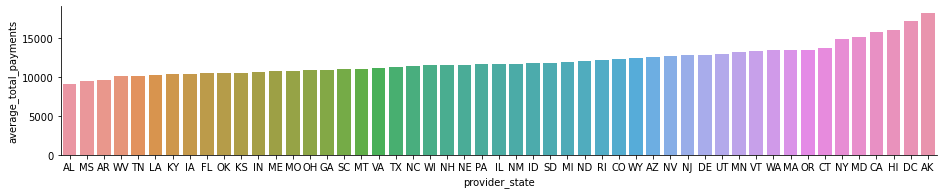

In [36]:
table1=payment_7years.sort_values('average_total_payments')
sns.catplot(kind='bar',x="provider_state",y='average_total_payments',data=table1,height=2.6, aspect=5)

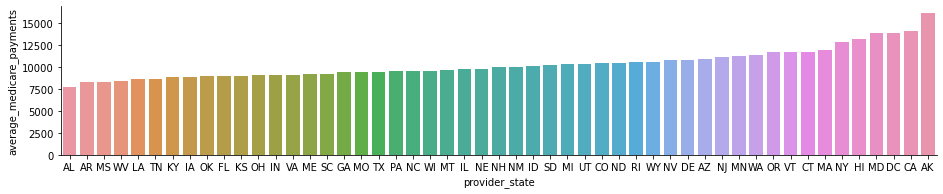

In [27]:
table2=payment_7years.sort_values('average_medicare_payments')
sns.catplot(kind='bar',x="provider_state",y='average_medicare_payments',data=table2 ,height=2.6, aspect=5)

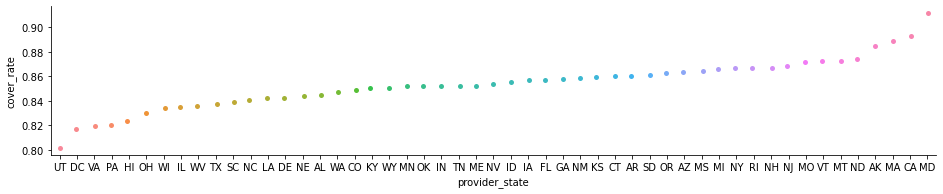

In [33]:
table3=payment_7years.sort_values('cover_rate')
sns.catplot(x="provider_state",y='cover_rate',data=table3 ,height=2.6, aspect=5)

The table shows the average total payment through out the US from 2011 to 2017. As we mention previously, we insert a 'year' column for each inpatient table. We union the inpatient payment tables altogether and list the average total payment for each year from 2011 to 2017. We are trying to see how does the US overall average total payments change throughout the times. As the list result shows, the average total payment increased each year from 2011 to 2017, especially that there was a significant increase during the year 2013 to 2014. The reason behind this was probably due to the Patient Protection and Affordable Care Act, and commonly known as Obamacare. The act came up in 2010 and implemented in 2014. 

In [22]:
%%bigquery
SELECT year,round(avg(average_total_payments),2) as avg_total_payment 
FROM `ba775-team-5a.temp.inpatient_payment_by_year`
GROUP BY year
order by year

,year,avg_total_payment
0,2011,9816.18
1,2012,10073.76
2,2013,10518.63
3,2014,13261.38
4,2015,13297.21
5,2016,13801.74
6,2017,14111.21


## 3. Exploratory Data Analysis

#### 3.1 What is the average total payment in each state in 2017?

As the table shows, the TOP 5 average total payment states are Alaska(AK), Washington D.C(DC), Hawaii(HI), California(CA), and Maryland(MD). And the state with lowest average total cost is Alabama(AL) with $10520 in year 2017.

In [23]:
%%bigquery
SELECT provider_state, AVG(average_total_payments) as average_total_payment
FROM `ba775-team-5a.temp.inpatient_2017`
GROUP BY provider_state
ORDER BY average_total_payment desc

,provider_state,average_total_payment
0,AK,21367.491281
1,DC,21094.415680
2,HI,19658.704740
3,CA,18417.925284
4,MD,17511.093303
5,NY,17330.004594
6,OR,16354.562671
7,WA,16168.052758
8,MN,16148.006433
9,CT,15650.991243


#### 3.2 Does medicare payments adjust geographically?

After comparing the result in each state to the nationwide medicare payments, it is obvious that medicare payments adjust geographically.

In [24]:
inpatient_2017 = pd.read_csv('Inpatient_2017.csv')
medicare_payments = inpatient_2017[['Provider_State','Average_Medicare_Payments']]
medicare_payments_states = (medicare_payments.groupby('Provider_State').mean()).sort_values(by="Average_Medicare_Payments",ascending = False)
avg_nation_m = medicare_payments_states['Average_Medicare_Payments'].mean()
medicare_payments_states['Average_nationwide'] = avg_nation_m
medicare_payments_states = medicare_payments_states.eval('Relative_to_nationwide = Average_Medicare_Payments/Average_nationwide').round({'Relative_to_nationwide':2})
medicare_payments_states = medicare_payments_states.drop(['Average_nationwide'],axis=1)
df_medicare = medicare_payments_states.reset_index()
df_medicare.info()
df_medicare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Provider_State             51 non-null     object 
 1   Average_Medicare_Payments  51 non-null     float64
 2   Relative_to_nationwide     51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


,Provider_State,Average_Medicare_Payments,Relative_to_nationwide
0,AK,18712.588521,1.57
1,CA,16207.739145,1.36
2,DC,16125.043837,1.35
3,MD,15984.234915,1.34
4,HI,15462.832478,1.30
5,NY,14793.432008,1.24
6,OR,14075.341138,1.18
7,MN,13701.566361,1.15
8,MA,13635.417149,1.14
9,WA,13419.406230,1.13


#### 3.3 What is the inpatient coverage rate in each state?

We use medicare payments divided by total payments to get the coverage rate. We can see the coverage rate varies from state to state.

In [38]:
cover_rate = inpatient_2015[['provider_state','average_medicare_payments','average_total_payments']]
c = cover_rate.groupby('provider_state').sum().eval('cover_rate = average_medicare_payments/ average_total_payments').round({'cover_rate':3})

,average_medicare_payments,average_total_payments,cover_rate
provider_state,,,
AK,4.477386e+06,5.030051e+06,0.890
AL,3.672016e+07,4.310629e+07,0.852
AR,2.251498e+07,2.625726e+07,0.857
AZ,4.050999e+07,4.721704e+07,0.858
CA,2.295004e+08,2.594942e+08,0.884
CO,2.549723e+07,3.024909e+07,0.843
CT,3.155988e+07,3.759063e+07,0.840
DC,1.094569e+07,1.416205e+07,0.773
DE,8.087012e+06,9.805910e+06,0.825


In [30]:
df = c.reset_index()
df

,provider_state,average_medicare_payments,average_total_payments,cover_rate
0,AK,4.477386e+06,5.030051e+06,0.890
1,AL,3.672016e+07,4.310629e+07,0.852
2,AR,2.251498e+07,2.625726e+07,0.857
3,AZ,4.050999e+07,4.721704e+07,0.858
4,CA,2.295004e+08,2.594942e+08,0.884
5,CO,2.549723e+07,3.024909e+07,0.843
6,CT,3.155988e+07,3.759063e+07,0.840
7,DC,1.094569e+07,1.416205e+07,0.773
8,DE,8.087012e+06,9.805910e+06,0.825
9,FL,1.499787e+08,1.756308e+08,0.854


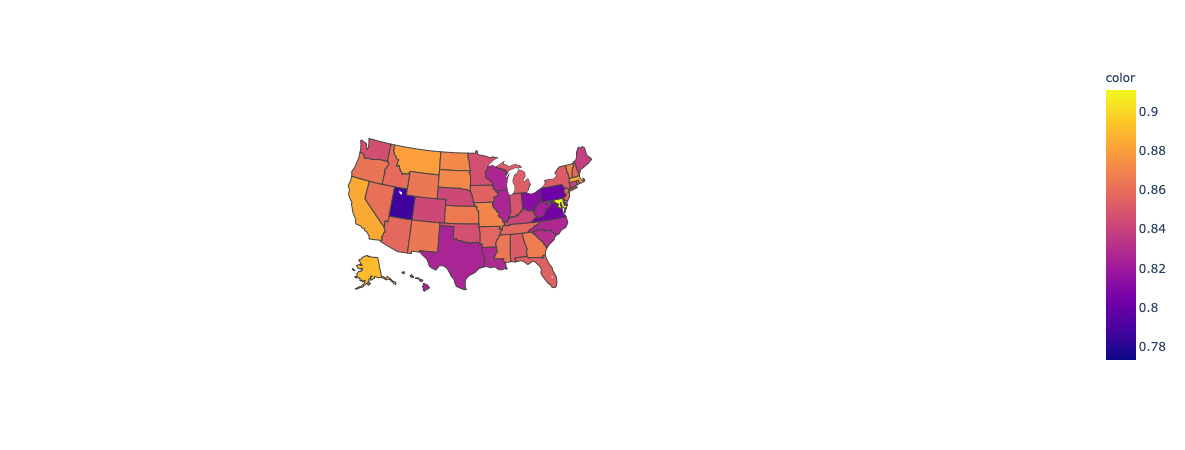

In [26]:
fig = px.choropleth(locations=df['provider_state'],locationmode='USA-states',color=df['cover_rate'],scope='usa')
fig.show()

#### 3.4 Why are the coverage rates for each state different?

We noticed that the coverage rates for each state in 2017 ranges from 0.76 (DC) to 0.91 (MD), so we would like to find the reason for the differences. We seek to clinical conditions (DRG_Definition in data), and list the clinical conditions with the highest covered charges for states with top 5 and bottom 5 coverage rates.

Top clinical conditions for top 5 states:

In [26]:
%%bigquery
SELECT provider_state, 
  DRG_definition AS clinical_conditions,
  SUM(Average_Medicare_Payments) as total_covered_charges
FROM `ba775-team-5a.temp.inpatient_2017`
WHERE provider_state IN ('MD', 'MT', 'MA', 'CA', 'MO')
group by provider_state, DRG_definition
ORDER BY provider_state, SUM(average_total_payments) desc

,provider_state,clinical_conditions,total_covered_charges
0,CA,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,8.938661e+06
1,CA,870 - SEPTICEMIA OR SEVERE SEPSIS W MV >96 HOURS,7.149665e+06
2,CA,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,7.094965e+06
3,CA,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 H...,4.215364e+06
4,CA,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,3.622862e+06
...,...,...,...
1708,MT,"087 - TRAUMATIC STUPOR & COMA, COMA <1 HR W/O ...",4.113375e+03
1709,MT,"282 - ACUTE MYOCARDIAL INFARCTION, DISCHARGED ...",3.109167e+03
1710,MT,"563 - FX, SPRN, STRN & DISL EXCEPT FEMUR, HIP,...",4.359733e+03
1711,MT,149 - DYSEQUILIBRIUM,3.515000e+03


Top clinical conditions for bottom 5 states:

In [27]:
%%bigquery
SELECT Provider_State, 
  DRG_definition AS clinical_conditions,
  SUM(Average_Medicare_Payments) as total_covered_charges
FROM `ba775-team-5a.temp.inpatient_2017`
WHERE provider_state IN ('DE', 'VA', 'PA', 'HI', 'DC')
GROUP BY Provider_State, DRG_definition
ORDER BY Provider_State, SUM(average_total_payments) desc

,Provider_State,clinical_conditions,total_covered_charges
0,DC,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,439034.308000
1,DC,"004 - TRACH W MV >96 HRS OR PDX EXC FACE, MOUT...",337887.767970
2,DC,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,290908.799980
3,DC,870 - SEPTICEMIA OR SEVERE SEPSIS W MV >96 HOURS,255107.603200
4,DC,981 - EXTENSIVE O.R. PROCEDURE UNRELATED TO PR...,212531.933600
...,...,...,...
1545,VA,185 - MAJOR CHEST TRAUMA W/O CC/MCC,4063.666667
1546,VA,179 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,4731.000000
1547,VA,882 - NEUROSES EXCEPT DEPRESSIVE,4597.666667
1548,VA,072 - NONSPECIFIC CEREBROVASCULAR DISORDERS W/...,4004.307692


The clinical conditions with the most covered charges for each state are similar, including major joint replacement, septicemia, heart failure, etc. Therefore, we further examine the coverage rates for the common top clinical conditions for those 10 states, and find out that coverage rates for those clinical conditions are good indicators of overall coverage rates for each state. 

In [28]:
%%bigquery
SELECT provider_state, 
  DRG_definition AS clinical_conditions,
  ROUND(SUM(Average_Medicare_Payments)/SUM(average_total_payments),3) AS cover_rate
FROM `ba775-team-5a.temp.inpatient_2017`
WHERE provider_state IN ('MD', 'MT', 'MA', 'CA', 'MO', 'DE', 'VA', 'PA', 'HI', 'DC')
  AND DRG_definition in 
    (SELECT DRG_definition AS clinical_conditions
    FROM `ba775-team-5a.temp.inpatient_2017`
    group by DRG_definition
    ORDER BY SUM(average_total_payments) desc
    LIMIT 15)
GROUP BY provider_state, DRG_definition
ORDER BY provider_state, cover_rate DESC

,provider_state,clinical_conditions,cover_rate
0,CA,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,0.949
1,CA,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,0.937
2,CA,870 - SEPTICEMIA OR SEVERE SEPSIS W MV >96 HOURS,0.935
3,CA,981 - EXTENSIVE O.R. PROCEDURE UNRELATED TO PR...,0.932
4,CA,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,0.928
...,...,...,...
142,VA,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,0.809
143,VA,460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,0.809
144,VA,330 - MAJOR SMALL & LARGE BOWEL PROCEDURES W CC,0.805
145,VA,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,0.768


### The relationship between life expectance and medicare payment

<AxesSubplot:xlabel='Life Expectancy', ylabel='average_total_payments'>

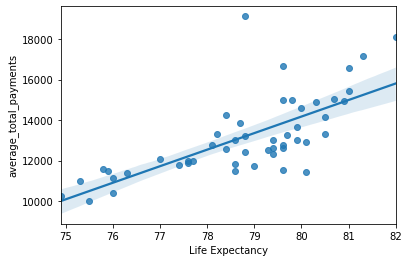

In [85]:
total_payment_by_state = inpatient_2015.copy()
total_payment_by_state_clean = total_payment_by_state.groupby('provider_state')['average_total_payments'].mean().to_frame().reset_index()
life_expectancy_clean = life_expectancy.drop(index=8).reset_index(drop=True)
life_payment = life_expectancy_clean.merge(total_payment_by_state_clean,left_on='State',right_on='provider_state', how='inner').drop('provider_state', axis=1)
sns.regplot(x='Life Expectancy',y='average_total_payments',data=life_payment)

## 4. Conclusions

Conclusions:
1. Average total payment increased through 2011-2017.
2. The clinical condition is the major factor on cover rate.

## 5. References

Reference：https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data